In [0]:
'''
* @Author: Uthsavi KP
* @Date: 2020-02-11 12:22:08 
* @Last Modified by: Uthsavi KP
* @Last Modified time: 2020-02-11 12:22:08  
* @Title : Data cleaning and saving file into blob storage
'''

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Reading data into spark datafarme
df_countrywise = spark.read.csv("/FileStore/tables/country_wise_latest.csv", header = "true")
df_daywise = spark.read.csv("/FileStore/tables/day_wise.csv", header = "true")
df_worldometer = spark.read.csv("/FileStore/tables/worldometer_data.csv", header = "true")

In [0]:
#Coverting spark dataframe to pandas dataframe
df_countrywise = df_countrywise.toPandas()
df_daywise = df_daywise.toPandas()
df_worldometer = df_worldometer.toPandas()

In [0]:
df_countrywise.head()

Out[4]:

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.5,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.0,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.6,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [0]:
print("Country wise",df_countrywise.shape)
print("Day wise",df_daywise.shape)
print("World meter",df_worldometer.shape)

Country wise (187, 15)
Day wise (188, 12)
World meter (209, 16)

In [0]:
df_countrywise.head()

Out[6]:

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.5,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.0,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.6,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [0]:
df_countrywise.drop(['New cases','New deaths','Deaths / 100 Recovered','Confirmed last week',
                    '1 week change','1 week % increase','WHO Region','Deaths / 100 Cases',
                    'Recovered / 100 Cases'],axis=1, inplace=True)

In [0]:
df_countrywise

Out[8]:

,Country/Region,Confirmed,Deaths,Recovered,Active,New recovered
0,Afghanistan,36263,1269,25198,9796,18
1,Albania,4880,144,2745,1991,63
2,Algeria,27973,1163,18837,7973,749
3,Andorra,907,52,803,52,0
4,Angola,950,41,242,667,0
...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,0
183,Western Sahara,10,1,8,1,0
184,Yemen,1691,483,833,375,36
185,Zambia,4552,140,2815,1597,465


In [0]:
df_countrywise.dtypes

Out[9]: Country/Region object
Confirmed object
Deaths object
Recovered object
Active object
New recovered object
dtype: object

In [0]:
convert_datatype = {"Confirmed" : int, "Deaths" : int, "Recovered" : int, "Active" : int, "New recovered" : int}
df_countrywise = df_countrywise.astype(convert_datatype)
print(df_countrywise.dtypes)

Country/Region object
Confirmed int64
Deaths int64
Recovered int64
Active int64
New recovered int64
dtype: object

In [0]:
#No missing values in contrywise dataset
df_countrywise.isnull().sum()

Out[11]: Country/Region 0
Confirmed 0
Deaths 0
Recovered 0
Active 0
New recovered 0
dtype: int64

Out[12]:

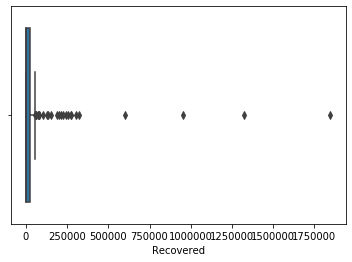

<matplotlib.axes._subplots.AxesSubplot at 0x7f7d59228cd0>

In [0]:
sns.boxplot(df_countrywise["Recovered"],data=df_countrywise)

In [0]:
#sns.catplot(x="Country/Region", y="Recovered", data=df_contrywise, kind="box" )

Out[14]:

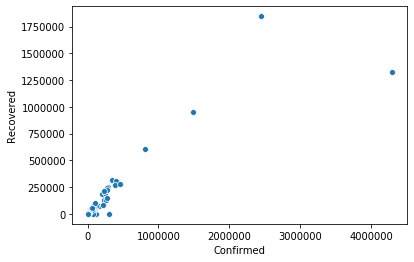

<matplotlib.axes._subplots.AxesSubplot at 0x7f7d547a5550>

In [0]:
sns.scatterplot(x = "Confirmed", y = "Recovered",data = df_countrywise)

Out[15]:

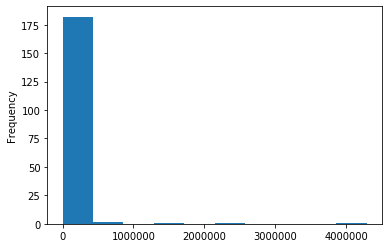

<matplotlib.axes._subplots.AxesSubplot at 0x7f7d54088fd0>

In [0]:
df_countrywise["Confirmed"].plot.hist()

Out[16]:

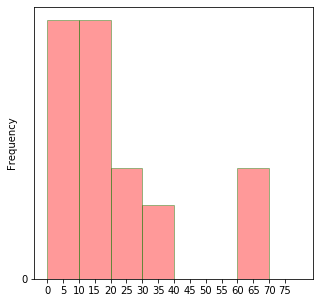

<matplotlib.axes._subplots.AxesSubplot at 0x7f7d457eac90>

In [0]:
plt.xticks(range(0,80,5))
plt.yticks(range(0,3000,10))
df_countrywise["Recovered"].plot.hist(bins=[0,10,20,30,40,50,60,70,80],figsize=(5,5),alpha=0.4,color="r",edgecolor="g")

In [0]:
#No missing values in daywise dataset
df_daywise.isnull().sum()

Out[17]: Date 0
Confirmed 0
Deaths 0
Recovered 0
Active 0
New cases 0
New deaths 0
New recovered 0
Deaths / 100 Cases 0
Recovered / 100 Cases 0
Deaths / 100 Recovered 0
No. of countries 0
dtype: int64

In [0]:
df_worldometer.isna().sum()

Out[18]: Country/Region 0
Continent 1
Population 1
TotalCases 0
NewCases 205
TotalDeaths 21
NewDeaths 206
TotalRecovered 4
NewRecovered 206
ActiveCases 4
Serious,Critical 87
Tot Cases/1M pop 1
Deaths/1M pop 22
TotalTests 18
Tests/1M pop 18
WHO Region 25
dtype: int64

In [0]:
(df_worldometer.isnull().sum() * 100 / df_worldometer.index.size).round(2)

Out[19]: Country/Region 0.00
Continent 0.48
Population 0.48
TotalCases 0.00
NewCases 98.09
TotalDeaths 10.05
NewDeaths 98.56
TotalRecovered 1.91
NewRecovered 98.56
ActiveCases 1.91
Serious,Critical 41.63
Tot Cases/1M pop 0.48
Deaths/1M pop 10.53
TotalTests 8.61
Tests/1M pop 8.61
WHO Region 11.96
dtype: float64

In [0]:
df_worldometer.head()

Out[20]:

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,None,162804,None,2576668,None,2292707,18296,15194,492,63139605,190640,Americas
1,Brazil,South America,212710692,2917562,None,98644,None,2047660,None,771258,8318,13716,464,13206188,62085,Americas
2,India,Asia,1381344997,2025409,None,41638,None,1377384,None,606387,8944,1466,30,22149351,16035,South-EastAsia
3,Russia,Europe,145940924,871894,None,14606,None,676357,None,180931,2300,5974,100,29716907,203623,Europe
4,South Africa,Africa,59381566,538184,None,9604,None,387316,None,141264,539,9063,162,3149807,53044,Africa


In [0]:
df_worldometer.drop(['NewCases','NewDeaths','NewRecovered','Serious,Critical',
                    'Tot Cases/1M pop','Deaths/1M pop','WHO Region','TotalTests',
                    'Tests/1M pop'],axis=1, inplace=True)

In [0]:
df_daywise.head()

Out[22]:

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.0,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [0]:
df_daywise.drop(['New cases','New deaths','Deaths / 100 Cases','Recovered / 100 Cases',
                    'Deaths / 100 Recovered'],axis=1, inplace=True)

In [0]:
spark_df = spark.createDataFrame(df_countrywise)

In [0]:
file_path = "wasbs://<container-name>@<storage-name>.blob.core.windows.net/country_wise_output"
spark_df.write.mode("overwrite").option("header",True).format("csv").save(file_path)

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-1435959031864258> in <module> 
 1 file_path = "wasbs://covid19container@covidstorage19.blob.core.windows.net/country_wise_output" 
 ----> 2 spark_df . write . mode ( "overwrite" ) . option ( "header" , True ) . format ( "csv" ) . save ( file_path ) 

 /databricks/spark/python/pyspark/sql/readwriter.py in save (self, path, format, mode, partitionBy, **options) 
 828 self . _jwrite . save ( ) 
 829 else : 
 --> 830 self . _jwrite . save ( path ) 
 831 
 832 @ since ( 1.4 ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 125 def deco ( * a , ** kw ) : 
 126 try : 
 --> 127 return f ( * a , ** kw ) 
 128 except py4j . protocol . Py4JJavaError as e : 
 129 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 --> 328 format(target_id, ".", name), value)
 329 else : 
 330 raise Py4JError(

 Py4JJavaError : An error occurred while calling o716.save.
: shaded.databricks.org.apache.hadoop.fs.azure.AzureException: shaded.databricks.org.apache.hadoop.fs.azure.AzureException: Container covid19container in account covidstorage19.blob.core.windows.net not found, and we can't create it using anoynomous credentials, and no credentials found for them in the configuration.
	at shaded.databricks.org.apache.hadoop.fs.azure.AzureNativeFileSystemStore.createAzureStorageSession(AzureNativeFileSystemStore.java:1037)
	at shaded.databricks.org.apache.hadoop.fs.azure.AzureNativeFileSystemStore.initialize(AzureNativeFileSystemStore.java:488)
	at shaded.databricks.org.apache.hadoop.fs.azure.NativeAzureFileSystem.initialize(NativeAzureFileSystem.java:1352)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:2669)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:370)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:295)
	at com.databricks.sql.transaction.tahoe.DeltaTableUtils$.findDeltaTableRoot(DeltaTable.scala:174)
	at com.databricks.sql.transaction.tahoe.DeltaValidation$.validateNonDeltaWrite(DeltaValidation.scala:191)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:323)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:296)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)
Caused by: shaded.databricks.org.apache.hadoop.fs.azure.AzureException: Container covid19container in account covidstorage19.blob.core.windows.net not found, and we can't create it using anoynomous credentials, and no credentials found for them in the configuration.
	at shaded.databricks.org.apache.hadoop.fs.azure.AzureNativeFileSystemStore.connectUsingAnonymousCredentials(AzureNativeFileSystemStore.java:782)
	at shaded.databricks.org.apache.hadoop.fs.azure.AzureNativeFileSystemStore.createAzureStorageSession(Azur